In [2]:
%matplotlib inline
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
plt.style.use("fivethirtyeight")

In [3]:
from get_stock_data import btc

In [4]:
data = btc["2016-12-22":"2017-11-11"]

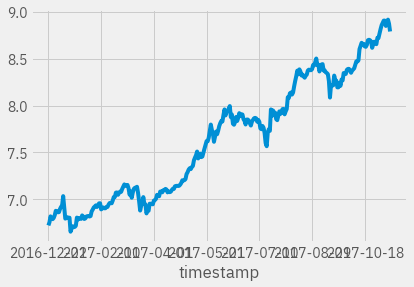

In [5]:
data.plot()

In [6]:
data_len = len(data)
data_len

325

In [7]:
y_data = np.array(data)


In [ ]:
with pm.Model() as model:
    A = pm.Uniform("A", 8, 10)
    B = pm.Uniform("B", -1, 0)
    C = pm.Uniform("C", 0, 1)
    beta = pm.Uniform("beta", 0.1, 0.9)
    t_c = pm.Uniform("t_c", 1, 100)
    omega = pm.Uniform("omega", 5, 12)
    phi = pm.Uniform("phi", 0, 2 * np.pi)
    X = np.arange(data_len)
    dt = (t_c + data_len) - X
    y_hat = A + B * dt ** beta * (1 + C * pm.math.cos(omega * pm.math.log(dt) + phi))
    sigma = pm.HalfNormal('sigma', sd=1)
    y = pm.Normal("y", y_hat, sd=sigma, observed=y_data)
    
    trace = pm.sample(2000, tune=500)
    

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma_log__, phi_interval__, omega_interval__, t_c_interval__, beta_interval__, C_interval__, B_interval__, A_interval__]
100%|██████████| 2500/2500 [01:38<00:00, 25.27it/s]


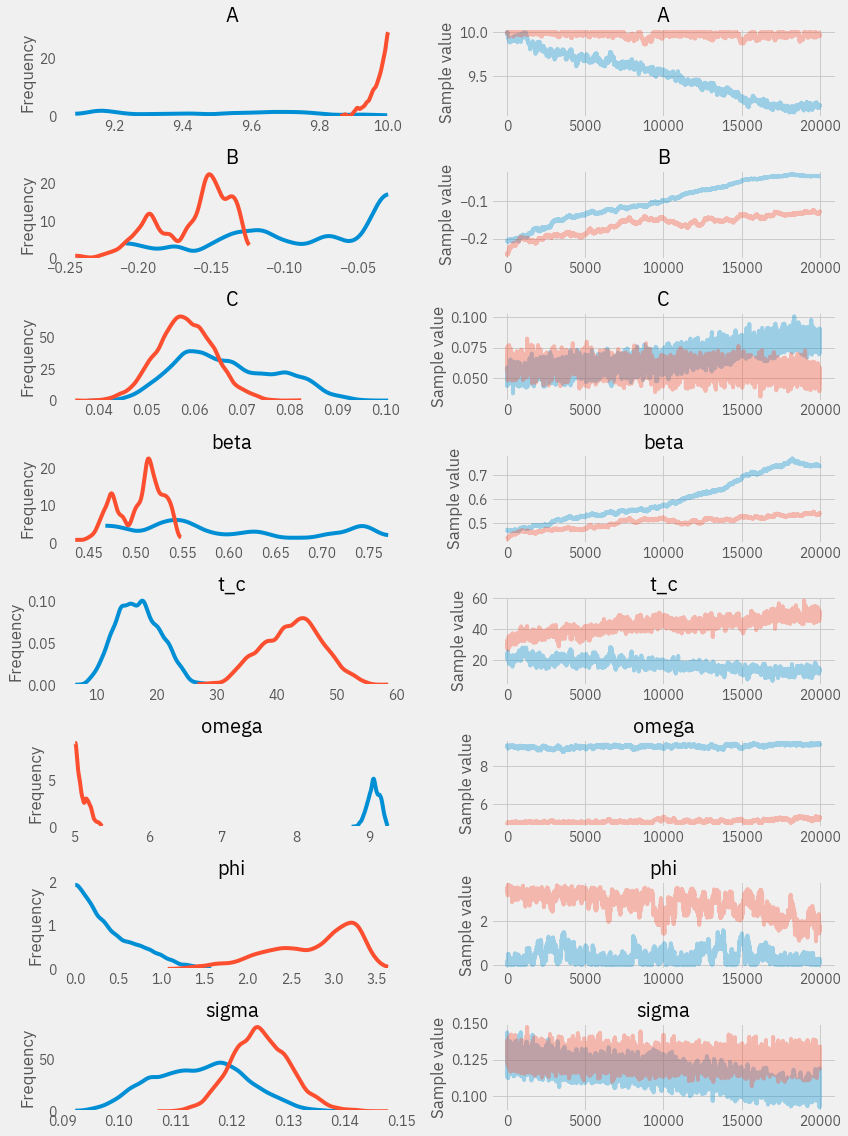

In [12]:
pm.traceplot(trace);

In [10]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
A,9.757027,0.210889,0.021030,9.429828,9.999977,1.0,3.754564
B,-0.218967,0.076855,0.007683,-0.321909,-0.104300,1.0,4.448376
C,0.061583,0.007740,0.000575,0.046976,0.076084,2.0,1.462514
beta,0.460317,0.056219,0.005619,0.392538,0.558736,1.0,3.418939
t_c,10.405369,2.018987,0.167907,7.278051,14.886396,3.0,1.247326
omega,7.909376,0.050630,0.004301,7.804306,7.995641,4.0,1.218201
phi,0.240368,0.225530,0.018898,0.000120,0.740133,44.0,1.005440
sigma,0.132520,0.008162,0.000628,0.117144,0.147494,1.0,1.669103
